# **Project - Depression Dataset**

This dataset explores the relationship between mental health and various demographic, lifestyle, and work related factors. It includes information on gender, age, work pressure, job satisfaction, sleep duration, dietary habits, financial stress, work hours, and mental health indicators such as depression, suicidal thoughts, and family history of mental illness. The dataset aims to provide insights into how lifestyle and work conditions influence mental well-being, making it suitable for exploratory data analysis, predictive modeling, and statistical research. Potential applications include identifying risk factors for mental health issues, understanding the impact of work-life balance, and predicting mental health outcomes based on lifestyle patterns.

https://www.kaggle.com/datasets/ikynahidwin/depression-professional-dataset

**List of columns:**

* Gender (Male/Female)

* Age (18-60)

* Work Pressure (Rating: 1-5)

* Job Satisfaction (Rating: 1-5)

* Sleep Duration (Less than 5 hours, 5-6 hours, 7-8 hours, More than 8 hours)

* Dietary Habits (Healthy, Moderate, Unhealthy)

* Have you ever had suicidal thoughts ? (Yes/No)

* Work Hours (0-12)

* Financial Stress (Rating: 1-5)

* Family History of Mental Illness (Yes/No)

* Depression (Yes/No, 90/10)

## **Tasks**

**1. Exploratory Data Analysis**

* Importing Packages

* Loading Dataset

* Data Insights

**2. Data Visualizations**

* Count of suicidal thoughts

* Count of family history

* Distribution of Having Depression (highly imbalanced)

* Look at depression by age

* Depression & Job Satisfaction

* Depression & Work Pressure

* Depression & Gender

* Plot of Work Hours

* Depression & Financial Stress

**3. Data Preprocessing**

* Festure Engineering

* Label Encoding

* One Hot Encoding

* Scaling

**4. Model Building**

* Split Data into train, validation, and test sets

* SMOTE (Synthetic Minority Oversampling Technique) for imbalanced datasets

* Logistic Regression

* Random Forest

* XG Boost

**5. Model Evaluation**

* Evaluation Metrics

* Fine-tuning hyperparameters

* Feature Selection

**6. Deployment**

In [1]:
#pip install seaborn

In [2]:
#pip install imblearn

In [3]:
#pip install xgboost

In [4]:
pip install --upgrade seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import streamlit as st
import pickle
import warnings
warnings.filterwarnings('ignore')

In [6]:
sns.set_theme(style="whitegrid") 
sns.set_palette("husl")          

In [7]:
# Read in the data

df = pd.read_csv('Depression Professional Dataset.csv')

In [8]:
# Print the first 5 rows

df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [9]:
# Get information on the variables (5 numerical and 6 categorical variables)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

In [10]:
# Each variable has the same number of observations (2054)

### **Have you ever had suicidal thoughts ?**

In [11]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
No     1065
Yes     989
Name: count, dtype: int64

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

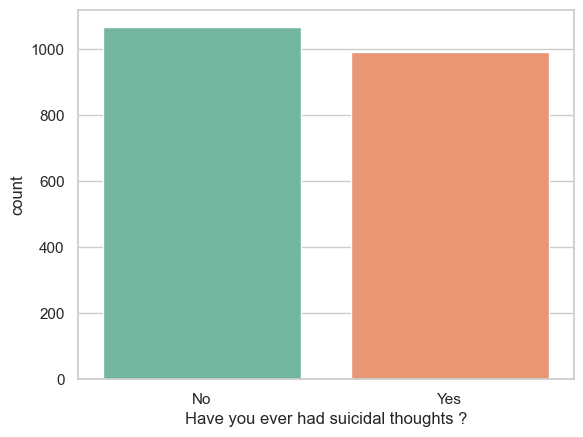

In [12]:
sns.countplot(data=df, x='Have you ever had suicidal thoughts ?', palette="Set2")

### **Family History of Mental Illness**

In [13]:
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     1046
Yes    1008
Name: count, dtype: int64

<Axes: xlabel='Family History of Mental Illness', ylabel='count'>

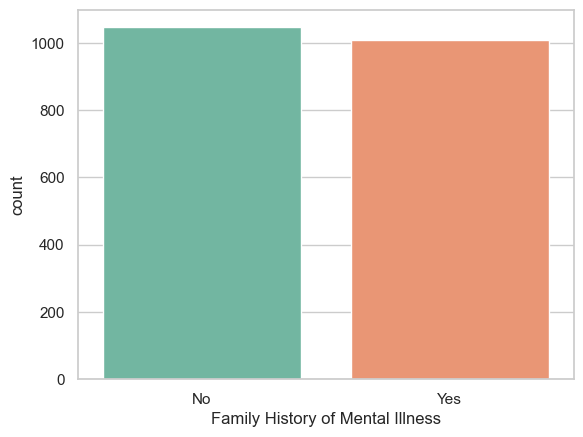

In [14]:
sns.countplot(data=df, x='Family History of Mental Illness', palette="Set2" )

In [15]:
# Label Encode Binary Categorical Variables (Gender, Depression, Family History of Mental Illness, Have you ever had suicidal thoughts ?)

#from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['Gender'] = enc.fit_transform(df['Gender']) # Male = 1, Female = 0
df['Depression'] = enc.fit_transform(df['Depression']) # Yes = 1, No = 0
df['Family History of Mental Illness'] = enc.fit_transform(df['Family History of Mental Illness'])
df['Have you ever had suicidal thoughts ?'] = enc.fit_transform(df['Have you ever had suicidal thoughts ?'])

In [16]:
df

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,37,2.0,4.0,7-8 hours,Moderate,0,6,2,0,0
1,1,60,4.0,3.0,5-6 hours,Unhealthy,1,0,4,1,0
2,0,42,2.0,3.0,5-6 hours,Moderate,0,0,2,0,0
3,0,44,3.0,5.0,7-8 hours,Healthy,1,1,2,1,0
4,1,48,4.0,3.0,7-8 hours,Moderate,1,6,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2049,0,45,1.0,3.0,Less than 5 hours,Healthy,1,2,5,1,0
2050,1,25,1.0,5.0,5-6 hours,Healthy,1,12,3,1,0
2051,0,23,3.0,1.0,Less than 5 hours,Moderate,1,8,3,0,1
2052,0,24,1.0,4.0,Less than 5 hours,Moderate,1,4,4,0,0


### **Sleep Duration**

In [17]:
df['Sleep Duration'].value_counts()

Sleep Duration
7-8 hours            530
Less than 5 hours    525
5-6 hours            505
More than 8 hours    494
Name: count, dtype: int64

### **Dietary Habits**

In [18]:
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    713
Healthy      681
Moderate     660
Name: count, dtype: int64

In [19]:
# One Hot Encoding for Multi-Class Columns (Sleep Duration and Dietary Habits have 3-4 categories)

df = pd.get_dummies(df, columns = ['Sleep Duration', 'Dietary Habits'], drop_first=True)

In [20]:
df

,Gender,Age,Work Pressure,Job Satisfaction,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Dietary Habits_Moderate,Dietary Habits_Unhealthy
0,0,37,2.0,4.0,0,6,2,0,0,True,False,False,True,False
1,1,60,4.0,3.0,1,0,4,1,0,False,False,False,False,True
2,0,42,2.0,3.0,0,0,2,0,0,False,False,False,True,False
3,0,44,3.0,5.0,1,1,2,1,0,True,False,False,False,False
4,1,48,4.0,3.0,1,6,5,1,0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,0,45,1.0,3.0,1,2,5,1,0,False,True,False,False,False
2050,1,25,1.0,5.0,1,12,3,1,0,False,False,False,False,False
2051,0,23,3.0,1.0,1,8,3,0,1,False,True,False,True,False
2052,0,24,1.0,4.0,1,4,4,0,0,False,True,False,True,False


### **Depression**

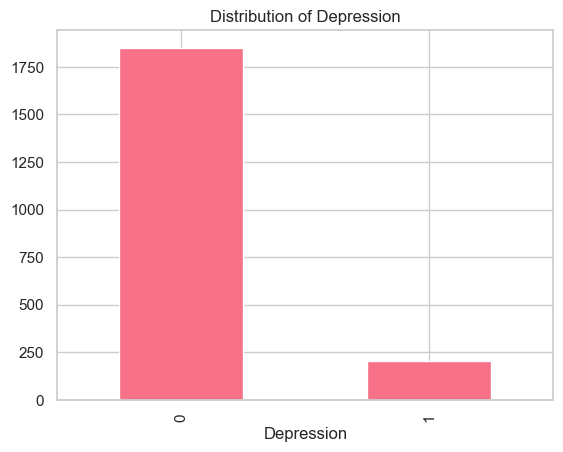

In [21]:
# Check the distribution of 'Depression' variable

df['Depression'].value_counts().plot(kind='bar')
plt.title('Distribution of Depression')
plt.show()

In [22]:
# The dataset is highly imbalanced (# of 0's (No) is very high compared to # of 1's (Yes))

### **Age**

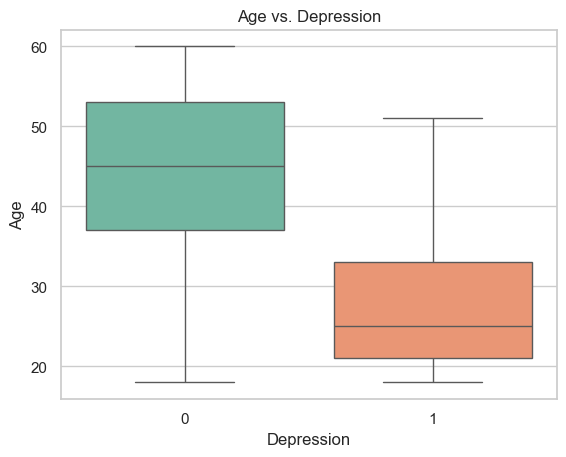

In [23]:
# Boxplot of Age vs. Depression

sns.boxplot(x = 'Depression', y='Age', data = df, palette="Set2")
plt.title('Age vs. Depression')
plt.show()

In [24]:
df["Age"].value_counts()

Age
56    73
49    72
38    71
47    66
46    64
51    63
50    63
53    63
42    63
57    62
35    61
59    61
40    61
43    59
48    59
39    59
54    59
41    57
45    57
36    56
55    51
37    51
44    51
60    50
58    49
52    46
33    36
18    36
29    35
31    35
28    34
25    32
24    32
34    32
27    31
26    30
23    29
22    28
20    28
30    27
21    24
19    21
32    17
Name: count, dtype: int64

In [25]:
df['Age'].describe()

count    2054.000000
mean       42.171860
std        11.461202
min        18.000000
25%        35.000000
50%        43.000000
75%        51.750000
max        60.000000
Name: Age, dtype: float64

In [26]:
df['Age'].median()

np.float64(43.0)

<Axes: xlabel='Age', ylabel='Density'>

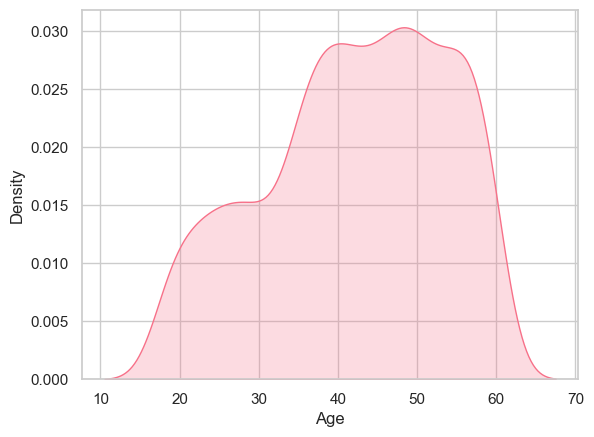

In [27]:
# Histogram of Age variable to show distribution

sns.kdeplot(df['Age'], shade = True)

### **Job Satisfaction**

In [28]:
df['Job Satisfaction'].describe()

count    2054.000000
mean        3.015093
std         1.418432
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Job Satisfaction, dtype: float64

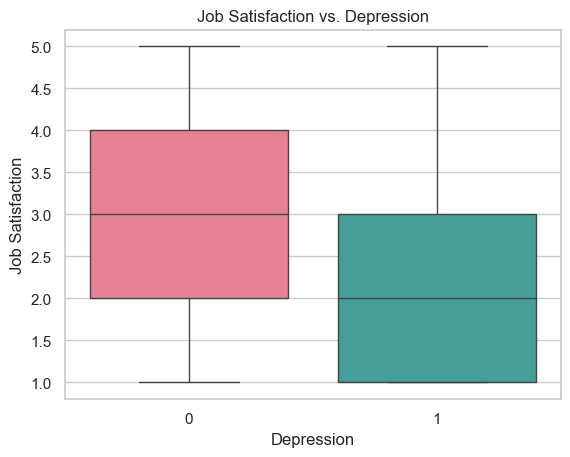

In [29]:
# Boxplot of Job Satisfaction vs. Depression

sns.boxplot(x = 'Depression', y='Job Satisfaction', data = df, palette="husl")
plt.title('Job Satisfaction vs. Depression')
plt.show()

### **Work Pressure**

In [30]:
df['Work Pressure'].describe()

count    2054.000000
mean        3.021908
std         1.417312
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Work Pressure, dtype: float64

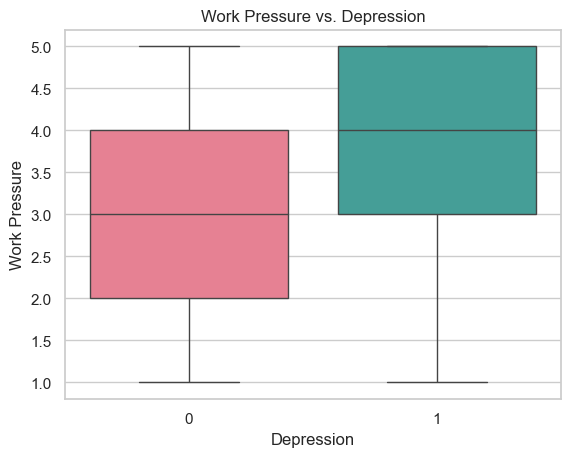

In [31]:
# Boxplot of Work Pressure vs. Depression

sns.boxplot(x = 'Depression', y='Work Pressure', data = df, palette="husl")
plt.title('Work Pressure vs. Depression')
plt.show()

### **Gender**

<Axes: xlabel='Gender', ylabel='count'>

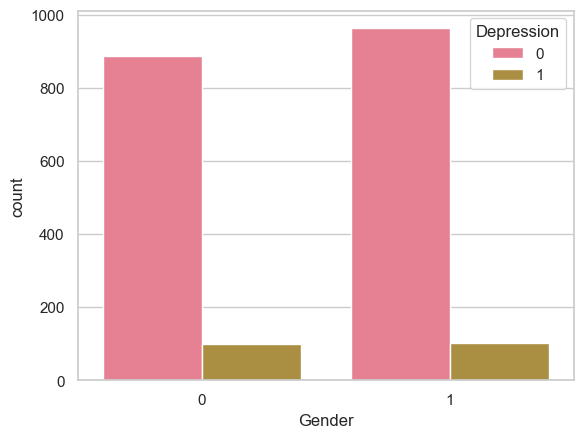

In [32]:
# Plot Gender vs. Depression

sns.countplot(x='Gender', hue='Depression', data =df)

### **Works Hours**

In [33]:
df['Work Hours'].describe()

count    2054.000000
mean        5.930867
std         3.773945
min         0.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: Work Hours, dtype: float64

<Axes: xlabel='Work Hours', ylabel='count'>

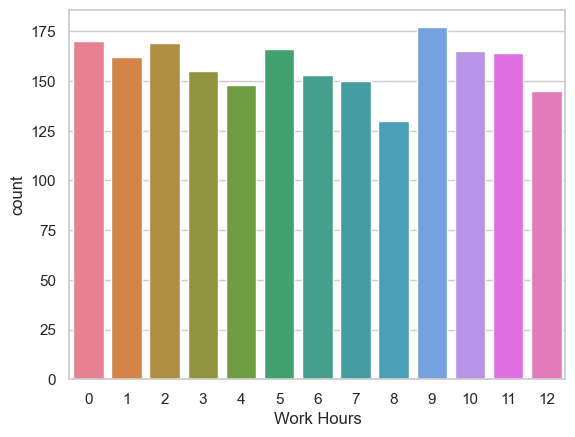

In [34]:
sns.countplot(x='Work Hours', data=df, palette="husl")

In [35]:
df['Work Hours'].median()

np.float64(6.0)

### **Financial Stress**

In [36]:
df['Financial Stress'].describe()

count    2054.000000
mean        2.978578
std         1.413362
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Financial Stress, dtype: float64

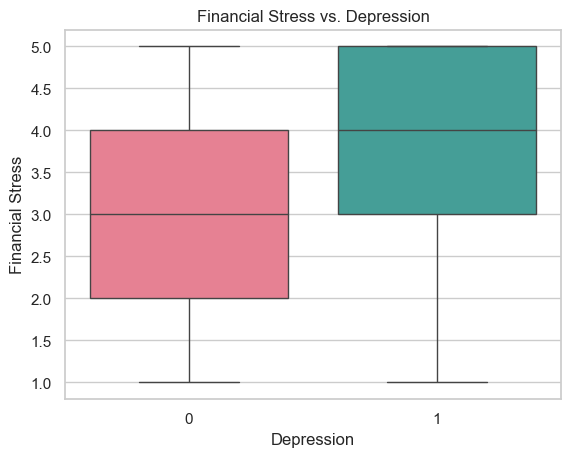

In [37]:
sns.boxplot(x = 'Depression', y='Financial Stress', data = df, palette="husl")
plt.title('Financial Stress vs. Depression')
plt.show()

In [38]:
# Create a composite variable

df['Work_Life_Balance'] = df['Job Satisfaction'] - df['Work Pressure']

In [39]:
df

,Gender,Age,Work Pressure,Job Satisfaction,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Work_Life_Balance
0,0,37,2.0,4.0,0,6,2,0,0,True,False,False,True,False,2.0
1,1,60,4.0,3.0,1,0,4,1,0,False,False,False,False,True,-1.0
2,0,42,2.0,3.0,0,0,2,0,0,False,False,False,True,False,1.0
3,0,44,3.0,5.0,1,1,2,1,0,True,False,False,False,False,2.0
4,1,48,4.0,3.0,1,6,5,1,0,True,False,False,True,False,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,0,45,1.0,3.0,1,2,5,1,0,False,True,False,False,False,2.0
2050,1,25,1.0,5.0,1,12,3,1,0,False,False,False,False,False,4.0
2051,0,23,3.0,1.0,1,8,3,0,1,False,True,False,True,False,-2.0
2052,0,24,1.0,4.0,1,4,4,0,0,False,True,False,True,False,3.0


### **Scaling**

In [40]:
# Scale numeric columns

#from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to scale

num_cols = ['Age', 'Work_Life_Balance', 'Work Hours', 'Financial Stress']

# Initialize Scaler

scaler = MinMaxScaler()

# Scale numerical columns

df[num_cols] = scaler.fit_transform(df[num_cols])

# Check scaled df

print(df.head())

   Gender       Age  Work Pressure  Job Satisfaction  \
0       0  0.452381            2.0               4.0   
1       1  1.000000            4.0               3.0   
2       0  0.571429            2.0               3.0   
3       0  0.619048            3.0               5.0   
4       1  0.714286            4.0               3.0   

   Have you ever had suicidal thoughts ?  Work Hours  Financial Stress  \
0                                      0    0.500000              0.25   
1                                      1    0.000000              0.75   
2                                      0    0.000000              0.25   
3                                      1    0.083333              0.25   
4                                      1    0.500000              1.00   

   Family History of Mental Illness  Depression  Sleep Duration_7-8 hours  \
0                                 0           0                      True   
1                                 1           0                 

In [41]:
#df.to_csv("new_data.csv", index=False)

### **Modeling**

In [42]:
# Split data in X features and y target

#from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Depression'])
y = df['Depression']

In [43]:
X.to_csv("new_data.csv", index=False)

In [44]:
# Splitting dataset into training, validation and test sets
# Training Set (60%), Validation Set (20%), Test Set (20%)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check the class distributions
print("Training Set Class Distribution:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nValidation Set Class Distribution:")
print(pd.Series(y_valid).value_counts(normalize=True))
print("\nTest Set Class Distribution:")
print(pd.Series(y_test).value_counts(normalize=True))

Training Set Class Distribution:
Depression
0    0.900974
1    0.099026
Name: proportion, dtype: float64

Validation Set Class Distribution:
Depression
0    0.900243
1    0.099757
Name: proportion, dtype: float64

Test Set Class Distribution:
Depression
0    0.902676
1    0.097324
Name: proportion, dtype: float64


In [45]:
#pip show scikit-learn

In [46]:
#pip list --outdated

In [47]:
#pip install --upgrade scikit-learn

In [48]:
#pip install --upgrade numpy scipy joblib

In [49]:
#!pip uninstall -y scikit-learn
#!pip install scikit-learn

In [50]:
#pip install imblearn

In [51]:
#!pip uninstall -y imblearn

#!conda install -c conda-forge imbalanced-learn

In [52]:
#pip install -U imbalanced-learn

### **Apply SMOTE Method due to Imbalanced Dataset**

In [53]:
#from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("After SMOTE, Training Set Class Distribution:")
print(pd.Series(y_train_smote).value_counts())

After SMOTE, Training Set Class Distribution:
Depression
0    1110
1    1110
Name: count, dtype: int64


In [54]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit on the original training data (to avoid data leakage)
scaler.fit(X_train)

# Transform the datasets
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Transform SMOTE data (if applicable)
X_train_smote_scaled = scaler.transform(X_train_smote)

### **Logistic Regression**

In [55]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


# Select Reduced Features
selected_features = ['Work_Life_Balance', 'Work Hours']  # Select a subset of features
X_train_reduced = X_train_scaled[:, [X.columns.get_loc(f) for f in selected_features]]
X_valid_reduced = X_valid_scaled[:, [X.columns.get_loc(f) for f in selected_features]]

# Train Base Logistic Regression on Reduced Features
print("Logistic Regression with Reduced Features:")
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_reduced, y_train)

y_valid_pred = log_model.predict(X_valid_reduced)
y_valid_proba = log_model.predict_proba(X_valid_reduced)[:, 1]

print(confusion_matrix(y_valid, y_valid_pred))
print(classification_report(y_valid, y_valid_pred))
print(f"Validation AUC: {roc_auc_score(y_valid, y_valid_proba)}\n")

# Step 3: Train Logistic Regression with Balanced Class Weights on All Features
print("Logistic Regression with Class Weight 'balanced' (All Features):")
log_model_weighted = LogisticRegression(class_weight='balanced', random_state=42)
log_model_weighted.fit(X_train_scaled, y_train)

y_valid_pred_weighted = log_model_weighted.predict(X_valid_scaled)
y_valid_proba_weighted = log_model_weighted.predict_proba(X_valid_scaled)[:, 1]

print(confusion_matrix(y_valid, y_valid_pred_weighted))
print(classification_report(y_valid, y_valid_pred_weighted))
print(f"Validation AUC: {roc_auc_score(y_valid, y_valid_proba_weighted)}\n")

Logistic Regression with Reduced Features:
[[370   0]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       370
           1       0.00      0.00      0.00        41

    accuracy                           0.90       411
   macro avg       0.45      0.50      0.47       411
weighted avg       0.81      0.90      0.85       411

Validation AUC: 0.802439024390244

Logistic Regression with Class Weight 'balanced' (All Features):
[[349  21]
 [  0  41]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       370
           1       0.66      1.00      0.80        41

    accuracy                           0.95       411
   macro avg       0.83      0.97      0.88       411
weighted avg       0.97      0.95      0.95       411

Validation AUC: 0.9988793671720501



### **Apply Weights to address imbalanced data**

In [56]:
# Custom Class Weights on All Features
print("Logistic Regression with Custom Class Weights {0: 1, 1: 3} (All Features):")
log_model_custom = LogisticRegression(class_weight={0: 1, 1: 3}, random_state=42)
log_model_custom.fit(X_train_scaled, y_train)

y_valid_pred_custom = log_model_custom.predict(X_valid_scaled)
y_valid_proba_custom = log_model_custom.predict_proba(X_valid_scaled)[:, 1]

print(confusion_matrix(y_valid, y_valid_pred_custom))
print(classification_report(y_valid, y_valid_pred_custom))
print(f"Validation AUC: {roc_auc_score(y_valid, y_valid_proba_custom)}\n")

Logistic Regression with Custom Class Weights {0: 1, 1: 3} (All Features):
[[364   6]
 [  1  40]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       370
           1       0.87      0.98      0.92        41

    accuracy                           0.98       411
   macro avg       0.93      0.98      0.96       411
weighted avg       0.98      0.98      0.98       411

Validation AUC: 0.9990112063282794



In [57]:
# Adjust Threshold for Class Weight 'balanced'
threshold = 0.3
print(f"Logistic Regression with Class Weight 'balanced' and Threshold = {threshold}:")
y_valid_pred_threshold = (y_valid_proba_weighted > threshold).astype(int)

print(confusion_matrix(y_valid, y_valid_pred_threshold))
print(classification_report(y_valid, y_valid_pred_threshold))
print(f"Validation AUC: {roc_auc_score(y_valid, y_valid_proba_weighted)}")

Logistic Regression with Class Weight 'balanced' and Threshold = 0.3:
[[322  48]
 [  0  41]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       370
           1       0.46      1.00      0.63        41

    accuracy                           0.88       411
   macro avg       0.73      0.94      0.78       411
weighted avg       0.95      0.88      0.90       411

Validation AUC: 0.9988793671720501


### **Try different thresholds for weights**

In [58]:
#from sklearn.metrics import confusion_matrix, classification_report

# Iterate through different thresholds
for threshold in [0.35, 0.4, 0.45]:
    print(f"Threshold: {threshold}")
    
    # Generate predictions based on the threshold
    y_valid_pred_threshold = (y_valid_proba_custom > threshold).astype(int)
    
    # Print Confusion Matrix and Classification Report
    cm = confusion_matrix(y_valid, y_valid_pred_threshold)
    print("Confusion Matrix:")
    print(cm)
    
    report = classification_report(y_valid, y_valid_pred_threshold, digits=4)
    print("Classification Report:")
    print(report)
    print("-" * 50)  # Separator for readability

Threshold: 0.35
Confusion Matrix:
[[352  18]
 [  0  41]]
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9514    0.9751       370
           1     0.6949    1.0000    0.8200        41

    accuracy                         0.9562       411
   macro avg     0.8475    0.9757    0.8975       411
weighted avg     0.9696    0.9562    0.9596       411

--------------------------------------------------
Threshold: 0.4
Confusion Matrix:
[[356  14]
 [  0  41]]
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9622    0.9807       370
           1     0.7455    1.0000    0.8542        41

    accuracy                         0.9659       411
   macro avg     0.8727    0.9811    0.9174       411
weighted avg     0.9746    0.9659    0.9681       411

--------------------------------------------------
Threshold: 0.45
Confusion Matrix:
[[360  10]
 [  1  40]]
Classification Report:
     

### **Model Evaluation**

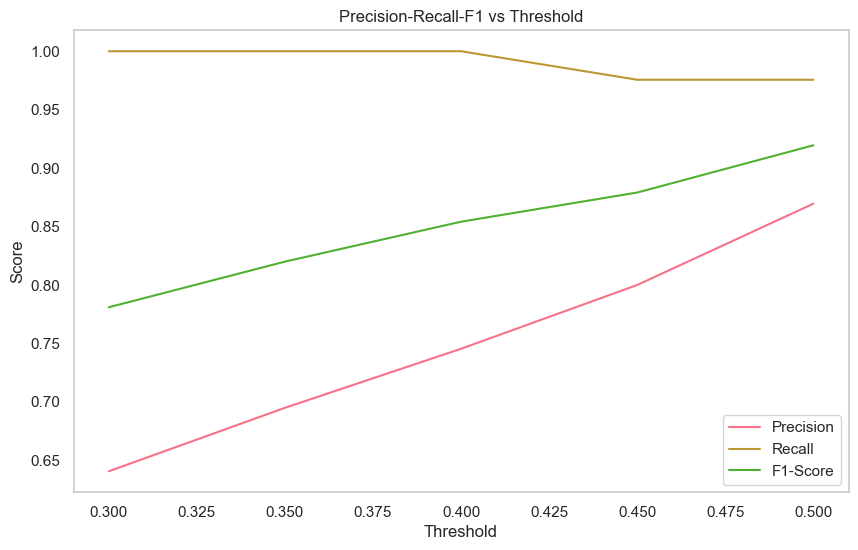

In [59]:
#from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.3, 0.35, 0.4, 0.45, 0.5]
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_valid_pred_threshold = (y_valid_proba_custom > threshold).astype(int)
    precisions.append(precision_score(y_valid, y_valid_pred_threshold))
    recalls.append(recall_score(y_valid, y_valid_pred_threshold))
    f1_scores.append(f1_score(y_valid, y_valid_pred_threshold))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1_scores, label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall-F1 vs Threshold")
plt.legend()
plt.grid()
plt.show()

### **Adjust Model Based on Results**

In [60]:
# Select the indices of the chosen features
feature_indices = [X.columns.get_loc(f) for f in selected_features]

# Extract the reduced test set
X_test_reduced = X_test_scaled[:, feature_indices]

In [61]:
# Define selected features
selected_features = ['Work_Life_Balance', 'Work Hours']

# Get the indices of these features
feature_indices = [X.columns.get_loc(f) for f in selected_features]

# Extract reduced test set
X_test_reduced = X_test_scaled[:, feature_indices]

# Predict on the test set with adjusted threshold
threshold = 0.45  # Choose the desired threshold
y_test_proba = log_model.predict_proba(X_test_reduced)[:, 1]
y_test_pred_threshold = (y_test_proba > threshold).astype(int)

# Evaluate the model
#from sklearn.metrics import confusion_matrix, classification_report

print("Test Set Metrics:")
print(confusion_matrix(y_test, y_test_pred_threshold))
print(classification_report(y_test, y_test_pred_threshold))

Test Set Metrics:
[[370   1]
 [ 40   0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       371
           1       0.00      0.00      0.00        40

    accuracy                           0.90       411
   macro avg       0.45      0.50      0.47       411
weighted avg       0.81      0.90      0.86       411



In [62]:
# Train Logistic Regression with SMOTE
log_model_smote = LogisticRegression(class_weight='balanced', random_state=42)
log_model_smote.fit(X_train_smote_scaled, y_train_smote)

# Evaluate on validation and test sets
y_valid_smote_proba = log_model_smote.predict_proba(X_valid_scaled)[:, 1]
y_test_smote_proba = log_model_smote.predict_proba(X_test_scaled)[:, 1]

In [63]:
#from sklearn.metrics import classification_report, roc_auc_score

# Non-SMOTE Metrics
print("Validation Metrics Without SMOTE:")
print(classification_report(y_valid, (y_valid_proba > 0.5).astype(int)))
print("Validation AUC Without SMOTE:", roc_auc_score(y_valid, y_valid_proba))

# SMOTE Metrics
print("Validation Metrics With SMOTE:")
print(classification_report(y_valid, (y_valid_smote_proba > 0.5).astype(int)))
print("Validation AUC With SMOTE:", roc_auc_score(y_valid, y_valid_smote_proba))

Validation Metrics Without SMOTE:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       370
           1       0.00      0.00      0.00        41

    accuracy                           0.90       411
   macro avg       0.45      0.50      0.47       411
weighted avg       0.81      0.90      0.85       411

Validation AUC Without SMOTE: 0.802439024390244
Validation Metrics With SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       370
           1       0.66      0.98      0.78        41

    accuracy                           0.95       411
   macro avg       0.83      0.96      0.88       411
weighted avg       0.96      0.95      0.95       411

Validation AUC With SMOTE: 0.9948582729070534


In [64]:
# Test Metrics With SMOTE
print("Test Metrics With SMOTE:")
print(classification_report(y_test, (y_test_smote_proba > 0.5).astype(int)))
print("Test AUC With SMOTE:", roc_auc_score(y_test, y_test_smote_proba))

Test Metrics With SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       371
           1       0.61      0.97      0.75        40

    accuracy                           0.94       411
   macro avg       0.80      0.95      0.86       411
weighted avg       0.96      0.94      0.94       411

Test AUC With SMOTE: 0.9914420485175202


In [65]:
thresholds = [0.3, 0.4, 0.45, 0.5]
print("Adjusted Thresholds for Test Set with SMOTE:")
for threshold in thresholds:
    y_test_pred = (y_test_smote_proba > threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print(classification_report(y_test, y_test_pred))

Adjusted Thresholds for Test Set with SMOTE:

Threshold: 0.3
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       371
           1       0.51      1.00      0.67        40

    accuracy                           0.91       411
   macro avg       0.75      0.95      0.81       411
weighted avg       0.95      0.91      0.92       411


Threshold: 0.4
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       371
           1       0.56      0.97      0.71        40

    accuracy                           0.92       411
   macro avg       0.78      0.95      0.83       411
weighted avg       0.95      0.92      0.93       411


Threshold: 0.45
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       371
           1       0.57      0.97      0.72        40

    accuracy                           0.92       411
   macro avg       0.78      0.95 

### **Feature Importance**

Feature Importance (Logistic Regression):
                                  Feature  Importance  Absolute Importance
1                                     Age  -10.506023            10.506023
6                        Financial Stress    3.814779             3.814779
5                              Work Hours    3.307457             3.307457
4   Have you ever had suicidal thoughts ?    3.058190             3.058190
2                           Work Pressure    2.943482             2.943482
13                      Work_Life_Balance   -2.739443             2.739443
3                        Job Satisfaction   -2.513725             2.513725
12               Dietary Habits_Unhealthy    2.136823             2.136823
11                Dietary Habits_Moderate    1.319934             1.319934
9        Sleep Duration_Less than 5 hours    1.228216             1.228216
10       Sleep Duration_More than 8 hours   -0.509550             0.509550
7        Family History of Mental Illness    0.383984     

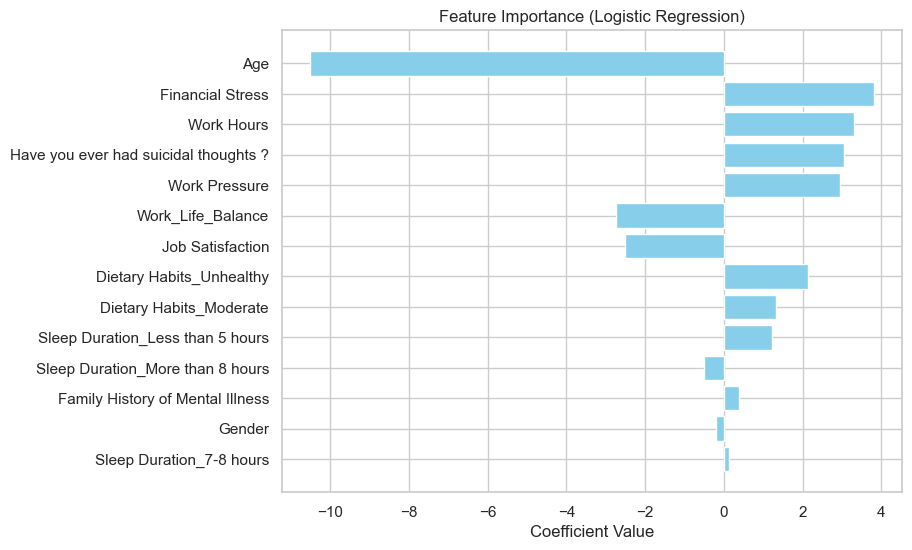

In [66]:
# Get feature names
feature_names = X.columns

# Extract coefficients from the logistic regression model
coefficients = log_model_smote.coef_[0]

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort the features by importance (absolute value)
feature_importance['Absolute Importance'] = np.abs(feature_importance['Importance'])
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

# Display feature importance
print("Feature Importance (Logistic Regression):")
print(feature_importance)

# Plot feature importance
#import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()

### **Random Forest Model**

Confusion Matrix (Validation Set):
[[366   4]
 [ 10  31]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       370
           1       0.89      0.76      0.82        41

    accuracy                           0.97       411
   macro avg       0.93      0.87      0.90       411
weighted avg       0.96      0.97      0.96       411


Validation AUC:
0.9859920896506262

Confusion Matrix (Test Set):
[[364   7]
 [ 11  29]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       371
           1       0.81      0.72      0.76        40

    accuracy                           0.96       411
   macro avg       0.89      0.85      0.87       411
weighted avg       0.95      0.96      0.96       411


Test AUC:
0.9769878706199461

Feature Importance (Random Forest):
                                  Feature  Importance
1 

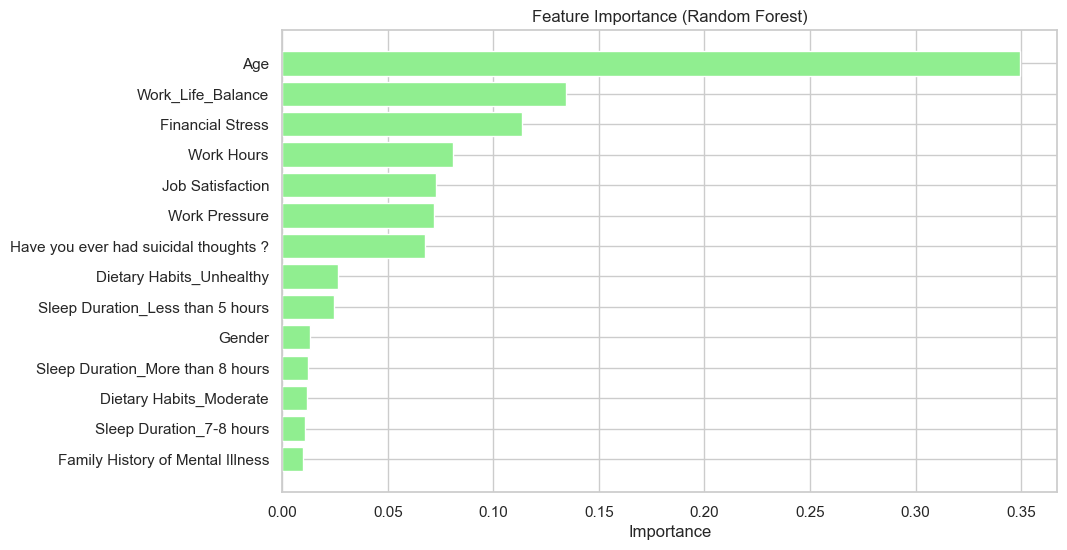

In [67]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
#import matplotlib.pyplot as plt
#import pandas as pd

# Train a Random Forest model on SMOTE data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train_smote_scaled, y_train_smote)

# Evaluate on the validation set
y_valid_rf_proba = rf_model.predict_proba(X_valid_scaled)[:, 1]  # Probabilities for AUC
y_valid_rf_pred = rf_model.predict(X_valid_scaled)  # Predictions for Confusion Matrix

# Evaluate Model Performance
print("Confusion Matrix (Validation Set):")
print(confusion_matrix(y_valid, y_valid_rf_pred))

print("\nClassification Report (Validation Set):")
print(classification_report(y_valid, y_valid_rf_pred))

print("\nValidation AUC:")
print(roc_auc_score(y_valid, y_valid_rf_proba))

# Evaluate on the test set
y_test_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
y_test_rf_pred = rf_model.predict(X_test_scaled)

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_rf_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_rf_pred))

print("\nTest AUC:")
print(roc_auc_score(y_test, y_test_rf_proba))

# Extract feature importance
rf_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance (Random Forest):")
print(rf_feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

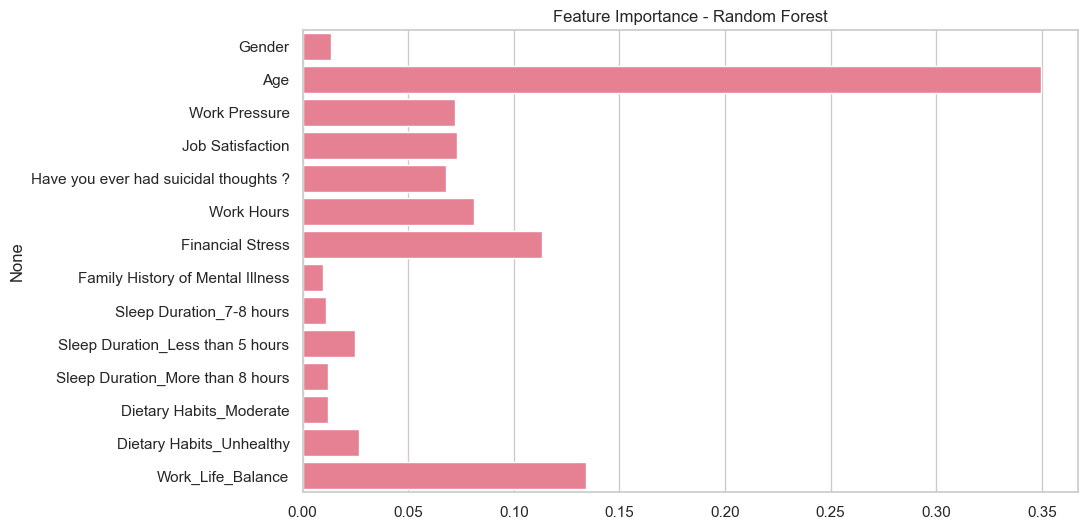

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.show()

### **Comparison of Models**

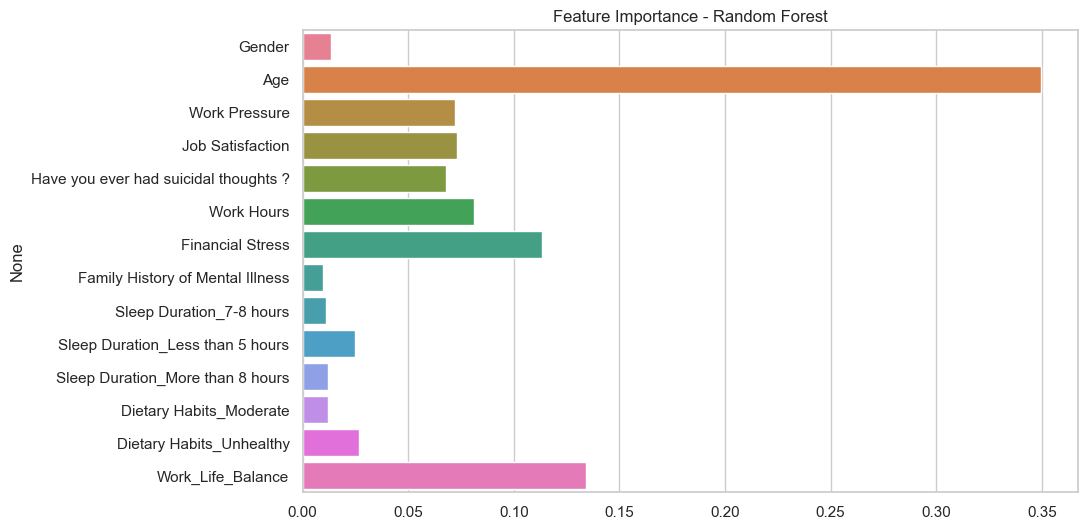

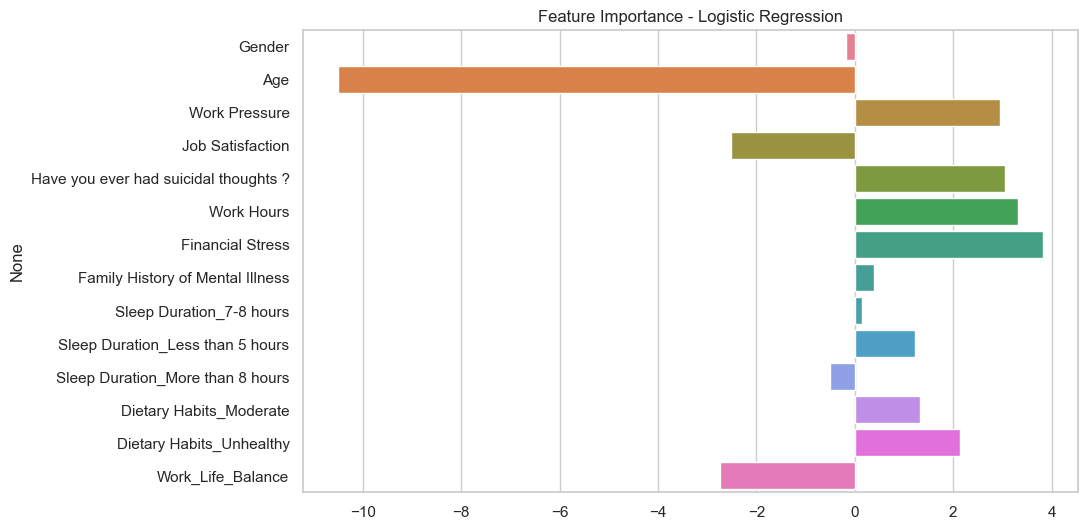

In [69]:
# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance, y=feature_names, palette="husl")
plt.title("Feature Importance - Random Forest")
plt.show()

# Plot Logistic Regression Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names, palette="husl")
plt.title("Feature Importance - Logistic Regression")
plt.show()

In [70]:
#from xgboost import XGBClassifier
#from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

### **XGBoost Method**

In [71]:
# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,  # Avoid warnings for label encoding
    eval_metric='logloss'     # Proper metric for binary classification
)

# Train the model on SMOTE-balanced training data
xgb_model.fit(X_train_smote_scaled, y_train_smote)

# Predict on the validation set
y_valid_xgb_proba = xgb_model.predict_proba(X_valid_scaled)[:, 1]
y_valid_xgb_pred = (y_valid_xgb_proba > 0.5).astype(int)

# Predict on the test set
y_test_xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_test_xgb_pred = (y_test_xgb_proba > 0.5).astype(int)

In [72]:
print("Validation Set Metrics (XGBoost):")
print(confusion_matrix(y_valid, y_valid_xgb_pred))
print(classification_report(y_valid, y_valid_xgb_pred))
print(f"Validation AUC: {roc_auc_score(y_valid, y_valid_xgb_proba):.4f}")

Validation Set Metrics (XGBoost):
[[362   8]
 [  7  34]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       370
           1       0.81      0.83      0.82        41

    accuracy                           0.96       411
   macro avg       0.90      0.90      0.90       411
weighted avg       0.96      0.96      0.96       411

Validation AUC: 0.9874


In [73]:
print("Test Set Metrics (XGBoost):")
print(confusion_matrix(y_test, y_test_xgb_pred))
print(classification_report(y_test, y_test_xgb_pred))
print(f"Test AUC: {roc_auc_score(y_test, y_test_xgb_proba):.4f}")

Test Set Metrics (XGBoost):
[[362   9]
 [  4  36]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       371
           1       0.80      0.90      0.85        40

    accuracy                           0.97       411
   macro avg       0.89      0.94      0.91       411
weighted avg       0.97      0.97      0.97       411

Test AUC: 0.9894


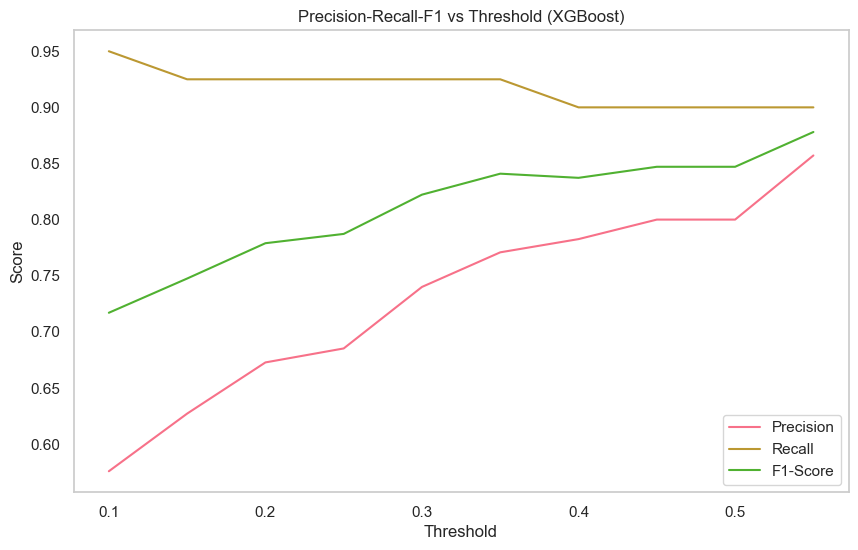

In [74]:
#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.metrics import precision_recall_curve

thresholds = np.arange(0.1, 0.6, 0.05)
precision_list, recall_list, f1_list = [], [], []

for threshold in thresholds:
    y_test_xgb_thresh = (y_test_xgb_proba > threshold).astype(int)
    precision = precision_score(y_test, y_test_xgb_thresh)
    recall = recall_score(y_test, y_test_xgb_thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot the precision-recall-F1 scores vs thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label="Precision")
plt.plot(thresholds, recall_list, label="Recall")
plt.plot(thresholds, f1_list, label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall-F1 vs Threshold (XGBoost)")
plt.legend()
plt.grid()
plt.show()

In [75]:
for threshold in [0.3, 0.4, 0.5]:
    y_test_xgb_thresh = (y_test_xgb_proba > threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(confusion_matrix(y_test, y_test_xgb_thresh))
    print(classification_report(y_test, y_test_xgb_thresh))

Threshold: 0.3
[[358  13]
 [  3  37]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       371
           1       0.74      0.93      0.82        40

    accuracy                           0.96       411
   macro avg       0.87      0.94      0.90       411
weighted avg       0.97      0.96      0.96       411

Threshold: 0.4
[[361  10]
 [  4  36]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       371
           1       0.78      0.90      0.84        40

    accuracy                           0.97       411
   macro avg       0.89      0.94      0.91       411
weighted avg       0.97      0.97      0.97       411

Threshold: 0.5
[[362   9]
 [  4  36]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       371
           1       0.80      0.90      0.85        40

    accuracy                           0.97       411
   macro avg  

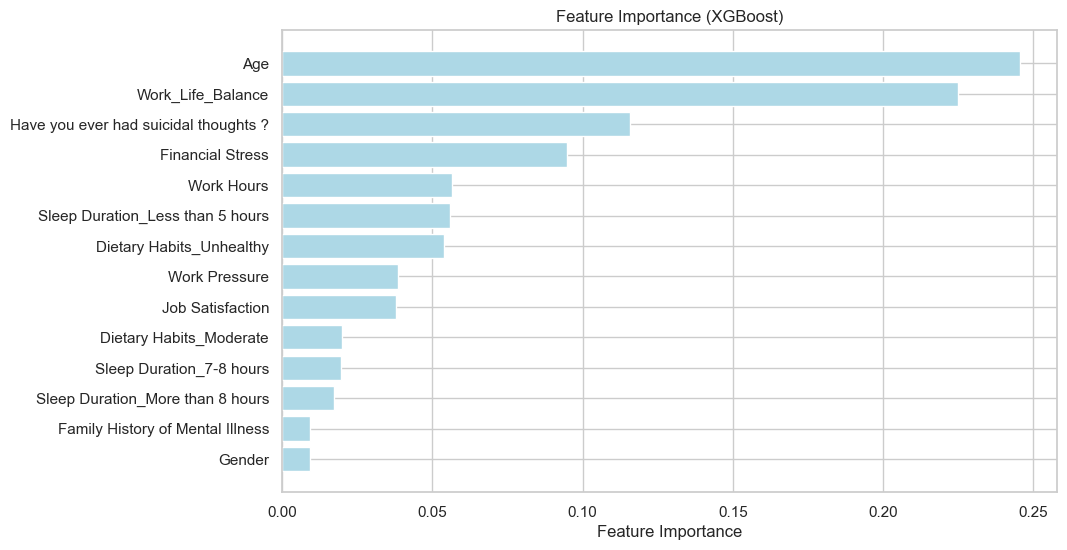

In [76]:
xgb_importance = xgb_model.feature_importances_
xgb_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance['Feature'], xgb_feature_importance['Importance'], color='lightblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance (XGBoost)")
plt.gca().invert_yaxis()
plt.show()

In [77]:
#pip install --upgrade scikit-learn xgboost

In [78]:
#import xgboost
#import sklearn

#print("XGBoost version:", xgboost.__version__)
#print("Scikit-learn version:", sklearn.__version__)

In [79]:
#!pip uninstall scikit-learn xgboost -y
#!pip install --upgrade scikit-learn xgboost

In [80]:
#import xgboost
#import sklearn

#print("XGBoost version:", xgboost.__version__)
#print("Scikit-learn version:", sklearn.__version__)

In [81]:
#!pip uninstall scikit-learn -y
#!pip install scikit-learn==1.4.2

In [82]:
#import sklearn
#import xgboost
#print("scikit-learn version:", sklearn.__version__)
#print("XGBoost version:", xgboost.__version__)

### **Hyperparameter Tuning**

In [83]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize XGBClassifier
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model with SMOTE data
random_search.fit(X_train_smote_scaled, y_train_smote)

# Print results
print("Best Parameters:", random_search.best_params_)
print("Best AUC Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best AUC Score: 0.9991356221085951


In [84]:
#pip list | grep 'scikit-learn\|xgboost'

In [85]:
#from xgboost import XGBClassifier
#from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Retrain the model with the best parameters
best_params = {
    'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1,
    'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0
}
xgb_best = XGBClassifier(**best_params, random_state=42)
xgb_best.fit(X_train_smote_scaled, y_train_smote)

# Test predictions
y_test_pred_proba = xgb_best.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Evaluation metrics
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))
print("Test AUC:", roc_auc_score(y_test, y_test_pred_proba))

Confusion Matrix (Test Set):
[[360  11]
 [  4  36]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       371
           1       0.77      0.90      0.83        40

    accuracy                           0.96       411
   macro avg       0.88      0.94      0.90       411
weighted avg       0.97      0.96      0.96       411

Test AUC: 0.9893530997304583


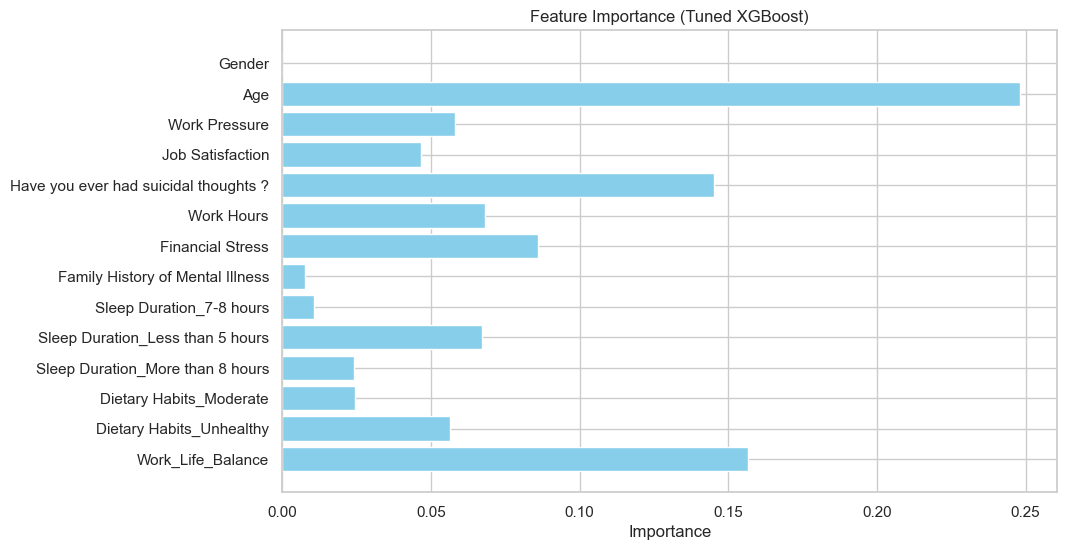

In [86]:
#import matplotlib.pyplot as plt

# Feature importance plot
feature_importances = xgb_best.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.title("Feature Importance (Tuned XGBoost)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

In [87]:
thresholds = [0.3, 0.4, 0.45, 0.5]
for t in thresholds:
    y_test_thresh = (y_test_proba > t).astype(int)
    print(f"Threshold: {t}")
    print(confusion_matrix(y_test, y_test_thresh))
    print(classification_report(y_test, y_test_thresh))

Threshold: 0.3
[[363   8]
 [ 38   2]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       371
           1       0.20      0.05      0.08        40

    accuracy                           0.89       411
   macro avg       0.55      0.51      0.51       411
weighted avg       0.84      0.89      0.86       411

Threshold: 0.4
[[369   2]
 [ 39   1]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       371
           1       0.33      0.03      0.05        40

    accuracy                           0.90       411
   macro avg       0.62      0.51      0.50       411
weighted avg       0.85      0.90      0.86       411

Threshold: 0.45
[[370   1]
 [ 40   0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       371
           1       0.00      0.00      0.00        40

    accuracy                           0.90       411
   macro avg 

In [88]:
#from sklearn.model_selection import cross_val_score
xgb_cv = XGBClassifier(**best_params, random_state=42)
scores = cross_val_score(xgb_cv, X_train_smote_scaled, y_train_smote, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC: {scores.mean():.4f}")

Cross-Validation AUC: 0.9991


In [89]:
print(y_test_proba[:10])  # Check predicted probabilities for the test set

[0.02986042 0.28606822 0.04493237 0.01092836 0.37982886 0.03989476
 0.08440149 0.13758007 0.11800386 0.01469713]


In [90]:
class_weight_ratio = len(y_train_smote) / (2 * sum(y_train_smote))

# Initialize XGBoost model with scale_pos_weight
xgb_smote_model = XGBClassifier(
    scale_pos_weight=class_weight_ratio,  # Set the weight ratio for class imbalance
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=1,
    gamma=0.1,
    colsample_bytree=1.0,
    subsample=1.0
)

In [91]:
# Train the model
xgb_smote_model.fit(X_train_smote_scaled, y_train_smote)

# Predict probabilities
y_test_proba = xgb_smote_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, (y_test_proba > 0.5).astype(int)))

print("\nClassification Report:")
print(classification_report(y_test, (y_test_proba > 0.5).astype(int)))

print("\nTest AUC:")
print(roc_auc_score(y_test, y_test_proba))

Confusion Matrix:
[[360  11]
 [  4  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       371
           1       0.77      0.90      0.83        40

    accuracy                           0.96       411
   macro avg       0.88      0.94      0.90       411
weighted avg       0.97      0.96      0.96       411


Test AUC:
0.9893530997304583


In [92]:
thresholds = [0.3, 0.4, 0.5]
for t in thresholds:
    y_pred_threshold = (y_test_proba > t).astype(int)
    print(f"\nThreshold: {t}")
    print(confusion_matrix(y_test, y_pred_threshold))
    print(classification_report(y_test, y_pred_threshold))


Threshold: 0.3
[[350  21]
 [  2  38]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       371
           1       0.64      0.95      0.77        40

    accuracy                           0.94       411
   macro avg       0.82      0.95      0.87       411
weighted avg       0.96      0.94      0.95       411


Threshold: 0.4
[[356  15]
 [  4  36]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       371
           1       0.71      0.90      0.79        40

    accuracy                           0.95       411
   macro avg       0.85      0.93      0.88       411
weighted avg       0.96      0.95      0.96       411


Threshold: 0.5
[[360  11]
 [  4  36]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       371
           1       0.77      0.90      0.83        40

    accuracy                           0.96       411
   macro av

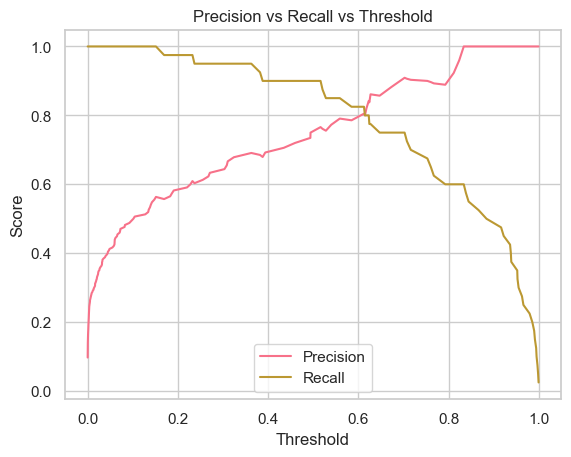

In [93]:
#from sklearn.metrics import precision_recall_curve
#import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision vs Recall vs Threshold")
plt.show()

### **Final Model**

In [94]:
# Adjust probabilities with threshold = 0.5
threshold = 0.5
y_test_pred_threshold = (y_test_proba > threshold).astype(int)

In [95]:
#from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Print confusion matrix
print("Confusion Matrix (Threshold = 0.50):")
print(confusion_matrix(y_test, y_test_pred_threshold))

# Print classification report
print("Classification Report (Threshold = 0.50):")
print(classification_report(y_test, y_test_pred_threshold))

# AUC remains unchanged (based on probabilities)
print("Test AUC:", roc_auc_score(y_test, y_test_proba))

Confusion Matrix (Threshold = 0.50):
[[360  11]
 [  4  36]]
Classification Report (Threshold = 0.50):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       371
           1       0.77      0.90      0.83        40

    accuracy                           0.96       411
   macro avg       0.88      0.94      0.90       411
weighted avg       0.97      0.96      0.96       411

Test AUC: 0.9893530997304583


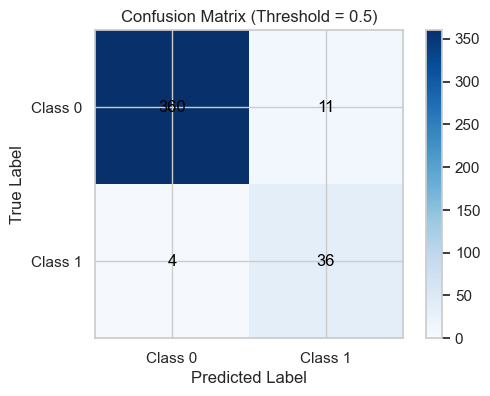

In [96]:
#import matplotlib.pyplot as plt
#import numpy as np

# Manually define confusion matrix values
cm = np.array([[360, 11],
               [4, 36]])

# Plot heatmap
plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap="Blues", vmin=0, vmax=360)  # Use Blues color map with a fixed range
plt.colorbar()

# Add text annotations
classes = ['Class 0', 'Class 1']
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=12)

# Set axis labels and ticks
plt.xticks([0, 1], classes)
plt.yticks([0, 1], classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.show()

In [97]:
#import pandas as pd
#from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    "Threshold": [0.3, 0.4, 0.45, 0.5],
    "Precision": [
        precision_score(y_test, (y_test_proba > 0.3).astype(int)),
        precision_score(y_test, (y_test_proba > 0.4).astype(int)),
        precision_score(y_test, (y_test_proba > 0.45).astype(int)),
        precision_score(y_test, (y_test_proba > 0.5).astype(int)),
    ],
    "Recall": [
        recall_score(y_test, (y_test_proba > 0.3).astype(int)),
        recall_score(y_test, (y_test_proba > 0.4).astype(int)),
        recall_score(y_test, (y_test_proba > 0.45).astype(int)),
        recall_score(y_test, (y_test_proba > 0.5).astype(int)),
    ],
    "F1-Score": [
        f1_score(y_test, (y_test_proba > 0.3).astype(int)),
        f1_score(y_test, (y_test_proba > 0.4).astype(int)),
        f1_score(y_test, (y_test_proba > 0.45).astype(int)),
        f1_score(y_test, (y_test_proba > 0.5).astype(int)),
    ]
}

metrics_df = pd.DataFrame(metrics)
print("Performance Comparison at Different Thresholds:")
print(metrics_df)

Performance Comparison at Different Thresholds:
   Threshold  Precision  Recall  F1-Score
0       0.30   0.644068    0.95  0.767677
1       0.40   0.705882    0.90  0.791209
2       0.45   0.720000    0.90  0.800000
3       0.50   0.765957    0.90  0.827586


### **Model Deployment**

In [98]:
#pip install streamlit

In [99]:
#import streamlit as st
#import pickle

In [100]:
# Save Model

with open("xgboost_smote_threshold_0.5.pkl", "wb") as f:
    pickle.dump(xgb_smote_model, f)
    
# Save Scaler

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [101]:
feature_names = X_train.columns.tolist()
with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)

In [102]:
# Build pipeline to process new data

def predict_new_data(new_data, model_path="xgboost_smote_threshold_0.5.pkl", scaler_path="scaler.pkl", feature_names_path="feature_names.pkl", threshold=0.5):
    import pickle
    import numpy as np

    # Load the model
    with open(model_path, "rb") as model_file:
        model = pickle.load(model_file)

    # Load the scaler
    with open(scaler_path, "rb") as scaler_file:
        scaler = pickle.load(scaler_file)

    # Load the feature names
    with open(feature_names_path, "rb") as f:
        feature_names = pickle.load(f)
    
    # Align new data with the feature names
    new_data = pd.DataFrame(new_data, columns=feature_names)
    
    # Preprocess the new data
    new_data_scaled = scaler.transform(new_data)
    
    # Predict probabilities
    probabilities = model.predict_proba(new_data_scaled)[:, 1]
    
    # Apply the threshold
    predictions = (probabilities > threshold).astype(int)
    
    return predictions, probabilities

In [103]:
#pip install inference

Note: you may need to restart the kernel to use updated packages.


In [104]:
# Deploy Model

#import streamlit as st
#import pandas as pd
from Inference import predict_new_data


st. title("Depression Prediction")

uploaded_file = st.file_uploader("Upload CSV", type=["csv"])
threshold = st.slider("Select Probability Threshold", 0.0, 1.0, 0.5)

if uploaded_file is not None:
    new_data = pd.read_csv(uploaded_file)
    predictions, proba = predict_new_data(new_data, threshold=threshold)
    new_data["Prediction"] = predictions
    new_data["Probability"] = proba

    st.write("Predictions:")
    st.write(new_data)
    st.download_button("Download Results", new_data.to_csv(index=False))

2024-12-25 09:45:48.606 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 09:45:48.887 
  command:

    streamlit run /Users/melissamayer/anaconda3/envs/dev/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-12-25 09:45:48.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 09:45:48.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 09:45:48.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 09:45:48.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 09:45:48.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 09:45:48.88

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1